# Unit 5 - Financial Planning

In [41]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables

my_btc = 1.2
my_eth = 5.3
load_dotenv()

True

In [3]:
conda list dontenv

# packages in environment at C:\Users\alexs\anaconda3\envs\dev:
#
# Name                    Version                   Build  Channel

Note: you may need to restart the kernel to use updated packages.


## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [4]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3


In [5]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [6]:
# Add format specifier to request url

btc_url = btc_url + "?format=json"
eth_url = eth_url + "?format=json"

In [7]:
# Fetch current BTC price

requests.get(btc_url)

<Response [200]>

In [8]:
#Store BTC esponse

BTC_response_data = requests.get(btc_url)
BTC_response_data.content

b'{\n\t"data": {\n\t\t"1": {\n\t\t\t"id": 1,\n\t\t\t"name": "Bitcoin",\n\t\t\t"symbol": "BTC",\n\t\t\t"website_slug": "bitcoin",\n\t\t\t"rank": 1,\n\t\t\t"circulating_supply": 19355493,\n\t\t\t"total_supply": 19355493,\n\t\t\t"max_supply": 21000000,\n\t\t\t"quotes": {\n\t\t\t\t"USD": {\n\t\t\t\t\t"price": 27469.0000000000000000,\n\t\t\t\t\t"volume_24h": 16422277618,\n\t\t\t\t\t"market_cap": 531974549935,\n\t\t\t\t\t"percentage_change_1h": 0.2299026968145810,\n\t\t\t\t\t"percentage_change_24h": -0.4907516174325820,\n\t\t\t\t\t"percentage_change_7d": -9.3586581168974400,\n\t\t\t\t\t"percent_change_1h": 0.2299026968145810,\n\t\t\t\t\t"percent_change_24h": -0.4907516174325820,\n\t\t\t\t\t"percent_change_7d": -9.3586581168974400\n\t\t\t\t}\n\t\t\t},\n\t\t\t"last_updated": 1682377173\n\t\t}\n\t},\n\t"metadata": {\n\t\t"timestamp": 1682377173,\n\t\t"num_cryptocurrencies": 3119,\n\t\t"error": null\n\t}\n}'

In [9]:
import json

In [10]:
#Formatting too JSON
BTC_response_data.json()

{'data': {'1': {'id': 1,
   'name': 'Bitcoin',
   'symbol': 'BTC',
   'website_slug': 'bitcoin',
   'rank': 1,
   'circulating_supply': 19355493,
   'total_supply': 19355493,
   'max_supply': 21000000,
   'quotes': {'USD': {'price': 27469.0,
     'volume_24h': 16422277618,
     'market_cap': 531974549935,
     'percentage_change_1h': 0.229902696814581,
     'percentage_change_24h': -0.490751617432582,
     'percentage_change_7d': -9.35865811689744,
     'percent_change_1h': 0.229902696814581,
     'percent_change_24h': -0.490751617432582,
     'percent_change_7d': -9.35865811689744}},
   'last_updated': 1682377173}},
 'metadata': {'timestamp': 1682377173,
  'num_cryptocurrencies': 3119,
  'error': None}}

In [11]:
# Format JSON with 
import json

In [12]:
# Fetch current ETH price

requests.get(eth_url)

<Response [200]>

In [13]:
# Store ETH Response
ETH_response_data = requests.get(eth_url)
ETH_response_data.content

b'{\n\t"data": {\n\t\t"1027": {\n\t\t\t"id": 1027,\n\t\t\t"name": "Ethereum",\n\t\t\t"symbol": "ETH",\n\t\t\t"website_slug": "ethereum",\n\t\t\t"rank": 2,\n\t\t\t"circulating_supply": 120409032,\n\t\t\t"total_supply": 120409032,\n\t\t\t"max_supply": 120409032,\n\t\t\t"quotes": {\n\t\t\t\t"USD": {\n\t\t\t\t\t"price": 1839.3600000000000000,\n\t\t\t\t\t"volume_24h": 9253373142,\n\t\t\t\t\t"market_cap": 221627338771,\n\t\t\t\t\t"percentage_change_1h": 0.3500110072131290,\n\t\t\t\t\t"percentage_change_24h": -1.2874951402068200,\n\t\t\t\t\t"percentage_change_7d": -13.1805470119018000,\n\t\t\t\t\t"percent_change_1h": 0.3500110072131290,\n\t\t\t\t\t"percent_change_24h": -1.2874951402068200,\n\t\t\t\t\t"percent_change_7d": -13.1805470119018000\n\t\t\t\t}\n\t\t\t},\n\t\t\t"last_updated": 1682377168\n\t\t}\n\t},\n\t"metadata": {\n\t\t"timestamp": 1682377168,\n\t\t"num_cryptocurrencies": 3119,\n\t\t"error": null\n\t}\n}'

In [14]:
#Formating to JSON
ETH_response_data.json()

{'data': {'1027': {'id': 1027,
   'name': 'Ethereum',
   'symbol': 'ETH',
   'website_slug': 'ethereum',
   'rank': 2,
   'circulating_supply': 120409032,
   'total_supply': 120409032,
   'max_supply': 120409032,
   'quotes': {'USD': {'price': 1839.36,
     'volume_24h': 9253373142,
     'market_cap': 221627338771,
     'percentage_change_1h': 0.350011007213129,
     'percentage_change_24h': -1.28749514020682,
     'percentage_change_7d': -13.1805470119018,
     'percent_change_1h': 0.350011007213129,
     'percent_change_24h': -1.28749514020682,
     'percent_change_7d': -13.1805470119018}},
   'last_updated': 1682377168}},
 'metadata': {'timestamp': 1682377168,
  'num_cryptocurrencies': 3119,
  'error': None}}

In [15]:
# Compute current value of my crpto

# Crypto Prices
BTC_Price = 28200.0
ETH_Price = 1939.65

In [16]:
BTC_Price = 28200.0
ETH_Price = 1939.65

In [17]:
# Current value of BTC

my_btc_value = (my_btc*BTC_Price)
my_btc_value

33840.0

In [18]:
# Current Value of ETH

my_eth_value = (my_eth*ETH_Price)
my_eth_value

10280.145

In [19]:
# Compute current value of my crpto

current_crypto_assets = (my_btc*BTC_Price) + (my_eth*ETH_Price)
current_crypto_assets

44120.145000000004

In [20]:
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $33840.00
The current value of your 5.3 ETH is $10280.15


In [21]:
!conda list alpaca


# packages in environment at C:\Users\alexs\anaconda3\envs\dev:
#
# Name                    Version                   Build  Channel
alpaca-trade-api          3.0.0                    pypi_0    pypi


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [22]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [23]:
load_dotenv()

True

In [24]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')

In [25]:
# Confirm loaded correctly
print(type(alpaca_api_key))
print(type(alpaca_secret_key))

<class 'str'>
<class 'str'>


In [40]:
# Create the Alpaca API object
alpaca_API_obj = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = 'v2'
)

In [27]:
# Format current date as ISO format
today = pd.Timestamp('2023-04-19', tz = 'America/New_York').isoformat()

In [28]:
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

In [29]:
# Get current closing prices for SPY and AGG
df_portfolio = alpaca_API_obj.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Display DF
df_portfolio

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2023-04-19 04:00:00+00:00,98.89,98.93,98.71,98.89,3592906,18630,98.843915,AGG
2023-04-19 04:00:00+00:00,412.22,415.08,412.16,414.14,55252464,421201,413.662834,SPY


In [30]:
# Reorganize the DataFrame
df = pd.DataFrame()

# Separate ticker data
SPY = df_portfolio[df_portfolio['symbol'] == 'SPY'].drop('symbol', axis = 1)
SPY

,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2023-04-19 04:00:00+00:00,412.22,415.08,412.16,414.14,55252464,421201,413.662834


In [31]:
# Separate ticker data
AGG = df_portfolio[df_portfolio['symbol'] == 'AGG'].drop('symbol', axis = 1)
AGG

,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2023-04-19 04:00:00+00:00,98.89,98.93,98.71,98.89,3592906,18630,98.843915


In [32]:
# Concatenate the ticker DataFrames
df_portfolio_concat = pd.concat([AGG,SPY], keys=['AGG','SPY'], axis = 1)

# Preview DataFrame
df_portfolio_concat

AGG                                            \
                            open   high    low  close   volume trade_count   
timestamp                                                                    
2023-04-19 04:00:00+00:00  98.89  98.93  98.71  98.89  3592906       18630   

                                         SPY                          \
                                vwap    open    high     low   close   
timestamp                                                              
2023-04-19 04:00:00+00:00  98.843915  412.22  415.08  412.16  414.14   

                                                             
                             volume trade_count        vwap  
timestamp                                                    
2023-04-19 04:00:00+00:00  55252464      421201  413.662834

In [67]:
df = pd.DataFrame()
# Pick AGG and SPY close prices

agg_close_price = df_portfolio_concat['AGG']['close'][0]
agg_close_price


98.89

In [68]:
# SPY Close Price
spy_close_price = df_portfolio_concat['SPY']['close'][0]
spy_close_price

414.14

In [69]:
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $98.89
Current SPY closing price: $414.14


In [70]:
# Compute the current value of shares
my_agg_value = agg_close_price * my_agg
my_agg_value

19778.0

In [71]:
my_spy_value = spy_close_price * my_spy
my_spy_value

20707.0

In [72]:
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $20707.00
The current value of your 200 AGG shares is $19778.00


### Savings Health Analysis

In [ ]:
# Set monthly household income
monthly_income = 1200

In [ ]:
# Consolidate financial assets data
savings_data = [
    ('my_btc_value' + 'my_eth_value'),
    ('my_spy_value' + 'my agg_value'),
]
savings_data

In [ ]:
  # Create savings DataFrame
# YOUR CODE HERE!

df_savings = pd.DataFrame(savings_data)

# Display savings DataFrame
display(df_savings)

In [ ]:
# Plot savings pie chart
# YOUR CODE HERE!

In [ ]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!

# Validate saving health
# YOUR CODE HERE!

## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [44]:
# Create the Alpaca API object
alpaca_API_obj = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = 'v2'
)

In [45]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [59]:
alpaca_API_obj.get_bars(
    tickers ,
    timeframe ,
    start = start_date ,
    end = end_date  
).df

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2016-05-02 04:00:00+00:00,110.74,110.7400,110.5200,110.605,3553939,15119,110.627199,AGG
2016-05-03 04:00:00+00:00,110.89,110.9450,110.7500,110.810,3044940,15662,110.865995,AGG
2016-05-04 04:00:00+00:00,110.91,110.9315,110.7595,110.860,2920608,13982,110.879063,AGG
2016-05-05 04:00:00+00:00,110.92,111.1600,110.8010,111.140,3008142,15707,111.028363,AGG
2016-05-06 04:00:00+00:00,111.12,111.1200,110.9700,110.970,2718710,12697,111.031967,AGG
...,...,...,...,...,...,...,...,...
2021-04-26 04:00:00+00:00,417.44,418.2200,416.8111,417.610,51824860,295870,417.508245,SPY
2021-04-27 04:00:00+00:00,417.93,418.1400,416.3000,417.520,50297139,296300,417.481360,SPY
2021-04-28 04:00:00+00:00,417.81,419.0100,416.9000,417.400,50692781,330049,417.742098,SPY


In [76]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!

df_newticker = alpaca_API_obj.get_bars(
    tickers ,
    timeframe ,
    start = start_date ,
    end = end_date  
).df

In [64]:
# Reorganize the DataFrame
# Separate ticker data
df_AGG = df_newticker[df_newticker['symbol'] == 'AGG'].drop('symbol', axis = 1)
df_SPY = df_newticker[df_newticker['symbol'] == 'SPY'].drop('symbol', axis = 1)

In [66]:
# Concatenate the ticker DataFrames
df_stock_data = pd.concat(
    [df_AGG, df_SPY],
    axis = 1,
    keys = ['AGG', 'SPY']   
)

# Display sample data
df_stock_data.head()

AGG                                        \
                             open      high       low    close   volume   
timestamp                                                                 
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.605  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.810  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.860  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.140  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.970  2718710   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2016-05-02 04:00:00+00:00       15119  110.627199  206.92  208.18  206.41   
2016-05-03 04:00:00+00:00       15662  110.865995  206.52  206.80  205.28   
2016-05-04 04:00:00+00:00       13982  110.879063  204.99  205.85  204.42   
2016-05-05 04:00:00+00:00       15707  111.028363  205.56  205.98  204.47   
2016-05-06 04:00:00+00:00       12697  111.031967  204.08  205.77  203.88   

                                                                        
                              close     volume trade_count        vwap  
timestamp                                                               
2016-05-02 04:00:00+00:00  207.9700   61908515      263580  207.294812  
2016-05-03 04:00:00+00:00  206.1592  106422142      377518  206.312060  
2016-05-04 04:00:00+00:00  205.0100   92199810      345261  205.090172  
2016-05-05 04:00:00+00:00  204.9700   67597222      280622  205.141555  
2016-05-06 04:00:00+00:00  205.7200   89131004      340335  204.937074

In [80]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)


In [81]:
# Printing the simulation input data
MC_thirtyyear.portfolio_data.head()

AGG                                        \
                             open      high       low    close   volume   
timestamp                                                                 
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.605  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.810  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.860  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.140  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.970  2718710   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00       15119  110.627199          NaN  206.92   
2016-05-03 04:00:00+00:00       15662  110.865995     0.001853  206.52   
2016-05-04 04:00:00+00:00       13982  110.879063     0.000451  204.99   
2016-05-05 04:00:00+00:00       15707  111.028363     0.002526  205.56   
2016-05-06 04:00:00+00:00       12697  111.031967    -0.001530  204.08   

                                                                            \
                             high     low     close     volume trade_count   
timestamp                                                                    
2016-05-02 04:00:00+00:00  208.18  206.41  207.9700   61908515      263580   
2016-05-03 04:00:00+00:00  206.80  205.28  206.1592  106422142      377518   
2016-05-04 04:00:00+00:00  205.85  204.42  205.0100   92199810      345261   
2016-05-05 04:00:00+00:00  205.98  204.47  204.9700   67597222      280622   
2016-05-06 04:00:00+00:00  205.77  203.88  205.7200   89131004      340335   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  207.294812          NaN  
2016-05-03 04:00:00+00:00  206.312060    -0.008707  
2016-05-04 04:00:00+00:00  205.090172    -0.005574  
2016-05-05 04:00:00+00:00  205.141555    -0.000195  
2016-05-06 04:00:00+00:00  204.937074     0.003659

In [83]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\alexs\desktop\bootcamp\Gitlab\Wk 6 Pyviz\05-APIs\Application\Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003883,0.998132,1.011009,1.000008,0.997382,1.010189,0.991053,1.008208,1.000821,1.001299,...,1.007916,0.995758,1.007746,1.003070,1.012194,1.000799,1.002268,1.000564,1.007192,1.002513
2,1.000179,0.986504,1.018454,0.996515,0.996518,1.015965,0.988276,1.006512,1.007171,0.996412,...,1.005779,0.998342,1.016107,0.988142,1.000393,1.012751,1.015427,0.994521,1.014192,1.005808
3,1.005106,0.990844,1.022556,1.007140,0.993126,1.008343,0.994325,1.008990,1.006618,0.992592,...,1.006597,0.996577,1.020230,0.982178,1.006294,1.004807,1.014457,1.002715,1.020495,1.015688
4,1.007992,0.988071,1.032752,1.014544,0.998493,1.020179,0.978581,1.001444,1.009071,0.991374,...,1.002706,1.002436,1.026019,0.988492,1.008453,1.006032,1.033992,1.001912,1.025000,1.024200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,12.479369,6.628110,11.581626,6.710804,19.103884,8.072229,12.840271,48.285468,5.730485,8.509489,...,35.525448,88.029678,42.180991,31.722645,10.090493,10.239890,10.400263,10.089627,6.024161,5.700953
7557,12.577054,6.609538,11.520630,6.716786,19.051471,8.113458,12.865396,48.273042,5.782063,8.524943,...,35.217622,88.653576,42.063271,31.477274,10.047074,10.313073,10.487362,10.277378,6.094140,5.688519
7558,12.440366,6.602989,11.566388,6.730063,18.887214,8.140675,12.846880,48.283110,5.766096,8.551061,...,35.315149,88.493382,42.237935,31.304214,10.017964,10.326860,10.439842,10.273839,6.046470,5.713690
7559,12.556466,6.612336,11.599250,6.779362,18.780975,8.222772,12.759071,49.121964,5.743406,8.504779,...,35.743929,87.488111,42.193418,31.344926,9.841673,10.400104,10.416551,10.294862,6.070352,5.692021


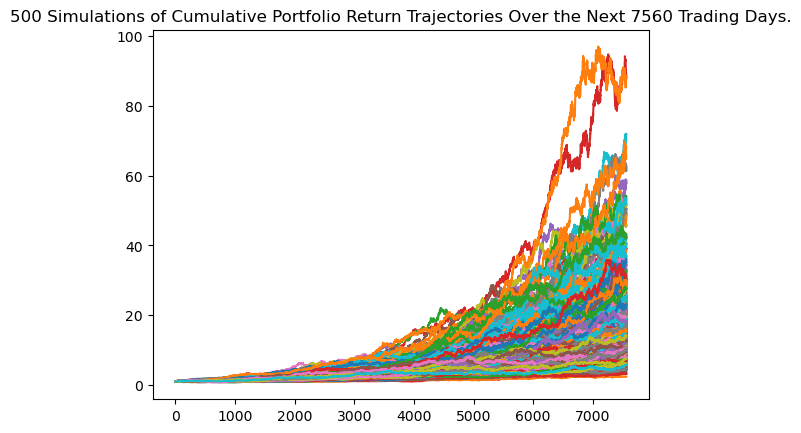

In [84]:
# Plot simulation outcomes
line_plot = MC_thirtyyear.plot_simulation()

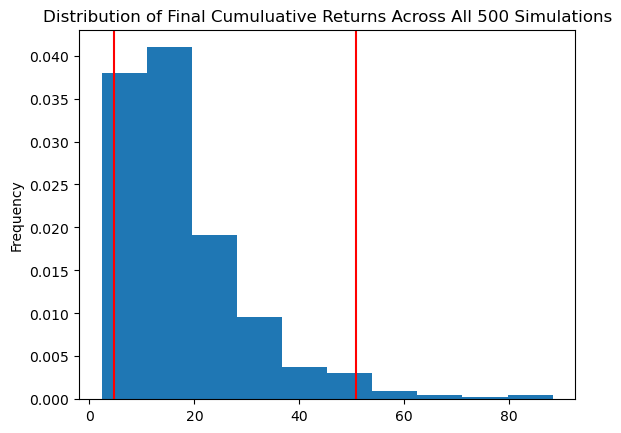

In [85]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirtyyear.plot_distribution()

### Retirement Analysis

In [88]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirtyyear.summarize_cumulative_return()

In [89]:
# Print summary statistics
print(tbl)

count           500.000000
mean             17.891037
std              12.261457
min               2.335249
25%               9.602244
50%              14.770201
75%              22.185579
max              88.260995
95% CI Lower      4.634043
95% CI Upper     50.817247
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [93]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower= round(tbl[8]*2000,2)
ci_upper= round(tbl[9]*2000,2)



# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $9268.09 and $101634.49


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [109]:
# Set initial investment
initial_investment = 20000 * 1.5
initial_investment

30000.0

In [110]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower= round(tbl[8]*30000,2)
ci_upper= round(tbl[9]*30000,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $139021.28 and $1524517.42


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")